In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np

def offset_style(horiz=1,vert=1):
    """generate offset parameters for a Text object, for function annotate or text.
    The optional parameters define the direction"""
    return dict(xytext=(horiz*2,vert*2),textcoords='offset points')

The issue is that plots are created by changing some global state. 
What we actually want is a base plot on which we can plot diverging things.
It looks like we have to draw the plots bottom up for each variation. 
That is frustrating. I'd be happy to find a solution.

In [2]:
############ global defaults for configuration
slope = -.5
offset = 1
V_default= lambda x: slope*x
A_default= lambda x: V_default(x)+offset
color1 = 'red'
color2 = 'blue'
faded = 'grey'
field_dim=5
x = np.linspace(-field_dim/2,field_dim/2,100)

In [3]:
#there seem to be too many ways to change these rc parameters
plt.rc('text.latex',preamble=r"\usepackage{amsfonts}")

#Ok we've spent an inordinate amount of time on this problem now
#We'll see if this is even better than tikz when we try to do the 3d graphics
#I don't like that all the points are specified numerically instead of being calculated.
plt.rc('mathtext',fontset='cm')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [43]:
def setup():
    #get plot data
    fig,ax=plt.subplots(figsize=(4,4), dpi=150)

    # Deactivate normal axes
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    #fix aspect ratio
    ax.set_aspect(1)

    plt.xlim(-field_dim/2,field_dim/2)
    plt.ylim(-field_dim/2,field_dim/2)

    # Make custom axes with arrows
    plt.quiver([0 , -field_dim/2],
               [-field_dim/2,  0],
               [0, field_dim],
               [field_dim,0],angles='xy', scale_units='xy', scale=1,zorder=0)

    ####### ℝ² annotation
    plt.annotate(r"$ V= \mathbb{R}^2 $", (2.0,2.5), **offset_style())

In [14]:
def plot_subspace(V=V_default):
    plt.plot(x, V(x), color=color1)
    plt.annotate('$U$', (1,V(1)),color=color1, **offset_style())

def plot_affine_space(A=A_default,zorder=1):
    plt.plot(x, A(x), c=color2, zorder=zorder)
    ###### title

def plot_addition_title(A=A_default):
    ###### title
    plt.annotate("$v+U = v'+U$", (1,A(1)), color=color2, **offset_style())
    
def plot_support_vectors(A=A_default,xs=[-1,1], color='k',zorder=1):
    ys=list(map(A, xs))
    #draw vectors from the origin
    zeroes=([0]*len(xs),[0]*len(xs))
    plt.quiver(*zeroes,xs,ys, angles='xy', scale_units='xy', scale=1,color=color)

    #annotate, taking into account position (to some extent) for offset also
    for x,y,i in zip(xs,ys,range(len(xs))):
        ha,right=('left',1) if x>=0 else ('right',-1)
        plt.annotate('$v'+"'"*i+"$", (x/2,y/2),
                 ha=ha,
                 va='top', 
                 color=color,
                 **offset_style(horiz=right,vert=-1)
                )

# $v+U=v'+U$

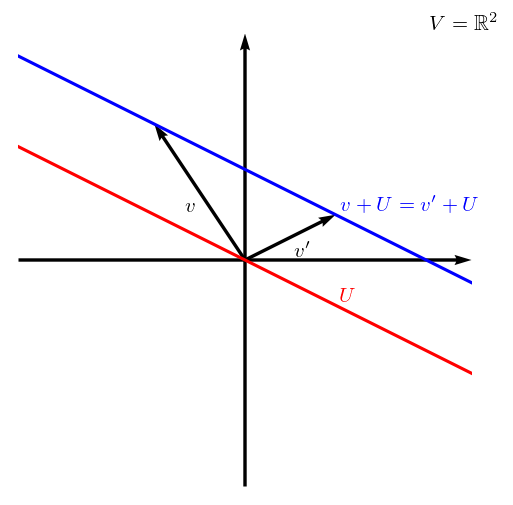

In [46]:
setup()
plot_subspace()
plot_affine_space()
plot_addition_title()
plot_support_vectors()
plt.savefig("v+U'.svg")

# $v-v'\in U$

In [38]:
def plot_vector_diff(A=A_default,xs=(-1,1),zorder=1,color='k'):
    "Only works for two vectors"
    ys=list(map(A, xs))
    plot_support_vectors()
    plt.quiver((xs[1]),(ys[1]),(xs[0]-xs[1]),(ys[0]-ys[1]), angles='xy', scale_units='xy', scale=1,color=color)

    plt.annotate(r"$v-v'\in U$", ((xs[0]-xs[1])/2+xs[1],(ys[0]-ys[1])/2+ys[1]),
                 ha='left',
                 va='bottom', 
                 color=color,
                 zorder=zorder,
                 **offset_style()
                )

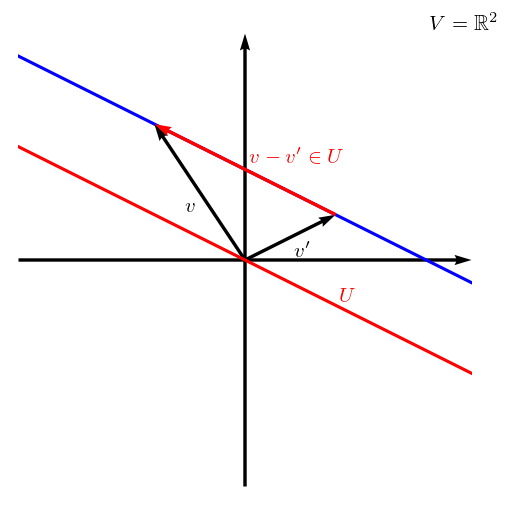

In [47]:
setup()
plot_subspace()
plot_affine_space(zorder=.5)
plot_vector_diff(color=color1)
plt.savefig("v-v'.svg")